In [ ]:
pip install augly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 39.3 MB/s eta 0:00:00
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31528 sha256=a445aaedfa06388d9f26acd269978e9023835cf5ebbb5925f29ffe99d8a91911
  Stored in directory: /root/.cache/pip/wheels/ba/5e/16/6117f8fe7e9c0c161a795e10d94645ebcf301ccbd01f66d8ec
Successfully built iopath


In [ ]:
pip install --upgrade augly pillow

In [ ]:
!unzip /content/test.zip

Archive:  /content/test.zip
   creating: cats/
  inflating: cats/cat_190.jpg        
  inflating: __MACOSX/cats/._cat_190.jpg  
  inflating: cats/cat_147.jpg        
  inflating: __MACOSX/cats/._cat_147.jpg  
  inflating: cats/cat_542.jpg        
  inflating: __MACOSX/cats/._cat_542.jpg  
  inflating: cats/cat_595.jpg        
  inflating: __MACOSX/cats/._cat_595.jpg  
  inflating: cats/cat_422.jpg        
  inflating: __MACOSX/cats/._cat_422.jpg  
  inflating: cats/cat_583.jpg        
  inflating: __MACOSX/cats/._cat_583.jpg  
  inflating: cats/cat_384.jpg        
  inflating: __MACOSX/cats/._cat_384.jpg  
  inflating: cats/cat_586.jpg        
  inflating: __MACOSX/cats/._cat_586.jpg  
  inflating: cats/cat_545.jpg        
  inflating: __MACOSX/cats/._cat_545.jpg  
  inflating: cats/cat_223.jpg        
  inflating: __MACOSX/cats/._cat_223.jpg  
  inflating: cats/cat_551.jpg        
  inflating: __MACOSX/cats/._cat_551.jpg  
  inflating: cats/cat_587.jpg        
  inflating: __MACOSX/ca

**Task 1**

Create a train and test set (train-test ratio should be 80:20%).

In [ ]:
import os
import shutil
import random


random.seed(42)


cats_dir = "/content/cats"
dogs_dir = "/content/dogs"

#Create Train and Test Directories
train_dir = "train"
test_dir = "test"
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Function to split images into train and test
def split_images(src_dir, class_label, train_dest, test_dest, train_ratio=0.8):
    """Splits images from a source folder into train and test sets."""
    all_images = [f for f in os.listdir(src_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    random.shuffle(all_images)

    # Compute split index (80% train, 20% test)
    split_index = int(train_ratio * len(all_images))
    train_images = all_images[:split_index]
    test_images = all_images[split_index:]

    # Copy images to respective directories
    for image_name in train_images:
        src_path = os.path.join(src_dir, image_name)
        new_filename = f"{class_label}_{image_name}"
        dest_path = os.path.join(train_dest, new_filename)
        shutil.copy(src_path, dest_path)

    for image_name in test_images:
        src_path = os.path.join(src_dir, image_name)
        new_filename = f"{class_label}_{image_name}"
        dest_path = os.path.join(test_dest, new_filename)
        shutil.copy(src_path, dest_path)

    print(f"{class_label.capitalize()} - Train: {len(train_images)}, Test: {len(test_images)}")


split_images(cats_dir, "cat", train_dir, test_dir)
split_images(dogs_dir, "dog", train_dir, test_dir)

# Final Stats
print(f"Total Training Images: {len(os.listdir(train_dir))}")
print(f"Total Testing Images: {len(os.listdir(test_dir))}")


Cat - Train: 56, Test: 14
Dog - Train: 56, Test: 14
Total Training Images: 112
Total Testing Images: 28


Create Custom Function using Augly, which will perform multiple random data augmentations according to input. (At least 10 data augmentation needs to be added like rotate, cropping, blur …)

In [ ]:
import os
import random
import glob
import numpy as np
from PIL import Image, ImageEnhance, ImageOps, ImageFilter
import augly.image as imaugs

def aug_rotate(image: Image.Image) -> Image.Image:
    # Rotate the image by a small angle (-15° to +15°)
    angle = random.uniform(-15, 15)
    return imaugs.rotate(image, degrees=angle)

def aug_crop(image: Image.Image) -> Image.Image:
    # Crop 80-95% of the image and resize back to original
    width, height = image.size
    crop_ratio = random.uniform(0.05, 0.2)
    left = int(width * crop_ratio)
    top = int(height * crop_ratio)
    right = int(width * (1 - crop_ratio))
    bottom = int(height * (1 - crop_ratio))
    cropped_image = image.crop((left, top, right, bottom))
    return cropped_image.resize((width, height), Image.Resampling.LANCZOS)

def aug_blur(image: Image.Image) -> Image.Image:
    # Apply slight Gaussian blur (radius 0.5-1.5)
    return image.filter(ImageFilter.GaussianBlur(radius=random.uniform(0.5, 1.5)))

def aug_adjust_contrast(image: Image.Image) -> Image.Image:
    # Adjust contrast slightly (0.9x to 1.1x).
    factor = random.uniform(0.9, 1.1)
    enhancer = ImageEnhance.Contrast(image)
    return enhancer.enhance(factor)

def aug_horizontal_flip(image: Image.Image) -> Image.Image:
    #Randomly flip the image horizontally
    return imaugs.hflip(image) if random.random() > 0.5 else image

def aug_jpeg_compression(image: Image.Image) -> Image.Image:
    #Apply slight JPEG compression
    return imaugs.encoding_quality(image, quality=random.randint(60, 100))

def aug_sharpen(image: Image.Image) -> Image.Image:
    #Apply sharpening to enhance edges
    return image.filter(ImageFilter.SHARPEN)

def aug_invert_colors(image: Image.Image) -> Image.Image:
    # Invert image colors for variation
    return ImageOps.invert(image)

def aug_brightness(image: Image.Image) -> Image.Image:
    #Adjust brightness slightly (0.9x to 1.1x)
    factor = random.uniform(0.9, 1.1)
    enhancer = ImageEnhance.Brightness(image)
    return enhancer.enhance(factor)

def aug_saturation(image: Image.Image) -> Image.Image:
    #Adjust saturation slightly (0.9x to 1.1x).
    factor = random.uniform(0.9, 1.1)
    enhancer = ImageEnhance.Color(image)
    return enhancer.enhance(factor)

def apply_random_augmentations(image: Image.Image, chain_length: int = 2) -> Image.Image:
    augmentation_functions = [
        aug_rotate,
        aug_crop,
        aug_blur,
        aug_adjust_contrast,
        aug_horizontal_flip,
        aug_jpeg_compression,
        aug_sharpen,
        aug_invert_colors,
        aug_brightness,
        aug_saturation
    ]
    chosen_funcs = random.sample(augmentation_functions, chain_length)
    augmented = image
    for func in chosen_funcs:
        augmented = func(augmented)
    return augmented

Perform data augmentation using the above function, only on the train set. (The number of augmented images should be twice the train set, and images should be augmented thrice example: cropped → rotate→Blur) (Second augmentation should be different )

In [ ]:
import os
import glob
from PIL import Image

train_dir = "train"
augmented_dir = "train_aug"

if not os.path.exists(augmented_dir):
    os.makedirs(augmented_dir)


train_image_paths = glob.glob(os.path.join(train_dir, "*.*"))
original_train_count = len(train_image_paths)
augmented_count = 0
counter = 1  # For unique filenames.

for img_path in train_image_paths:
    try:
        image = Image.open(img_path).convert("RGB")
    except Exception as e:
        print(f"Error opening {img_path}: {e}")
        continue

    base_name, ext = os.path.splitext(os.path.basename(img_path))

    # Generate two augmented versions (each using a chain of 3 augmentations).
    aug1 = apply_random_augmentations(image, chain_length=3)
    aug2 = apply_random_augmentations(image, chain_length=3)

    # Ensure the two augmentations are different.
    while aug2.tobytes() == aug1.tobytes():
        aug2 = apply_random_augmentations(image, chain_length=3)

    # Save augmented images in the separate folder with unique filenames.
    aug1_filename = os.path.join(augmented_dir, f"{base_name}_aug1_{counter}{ext}")
    aug2_filename = os.path.join(augmented_dir, f"{base_name}_aug2_{counter}{ext}")
    aug1.save(aug1_filename)
    aug2.save(aug2_filename)

    augmented_count += 2
    counter += 1


Show the statistics of the newly created dataset. (Old dataset count and new dataset count)

In [ ]:
import os
import glob

# Count original images from the original folder.
old_count = len(glob.glob(os.path.join(train_dir, "*.*")))

# Count augmented images from the augmented folder.
aug_count = len(glob.glob(os.path.join(augmented_dir, "*.*")))

# The new dataset count is the sum of originals and augmented images.
new_count = old_count + aug_count

print("Old dataset count (original images):", old_count)
print("Augmented image count:", aug_count)
print("New dataset count (original + augmented images):", new_count)


Old dataset count (original images): 112
Augmented image count: 224
New dataset count (original + augmented images): 336


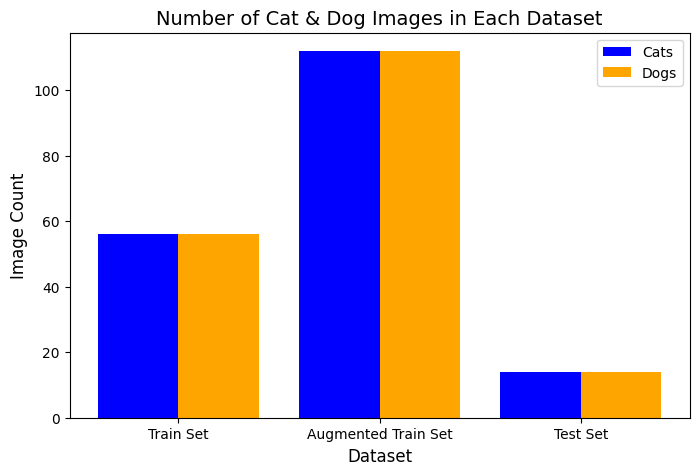

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Define dataset paths
train_dir = "/content/train"
train_aug_dir = "/content/train_aug"
test_dir = "/content/test"

# Function to count the number of cat and dog images in a dataset directory
def count_images(directory):

    cat_count = 0
    dog_count = 0


    for filename in os.listdir(directory):
        if filename.lower().startswith("cat_"):
            cat_count += 1
        elif filename.lower().startswith("dog_"):
            dog_count += 1

    return cat_count, dog_count

# Get counts for each dataset
train_cats, train_dogs = count_images(train_dir)
aug_train_cats, aug_train_dogs = count_images(train_aug_dir)
test_cats, test_dogs = count_images(test_dir)

# Prepare data for visualization
dataset_labels = ["Train Set", "Augmented Train Set", "Test Set"]
cat_counts = [train_cats, aug_train_cats, test_cats]
dog_counts = [train_dogs, aug_train_dogs, test_dogs]
x = np.arange(len(dataset_labels))


fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.4

# Plot bars for Cats and Dogs
ax.bar(x - bar_width/2, cat_counts, bar_width, label="Cats", color="blue")
ax.bar(x + bar_width/2, dog_counts, bar_width, label="Dogs", color="orange")


ax.set_title("Number of Cat & Dog Images in Each Dataset", fontsize=14)
ax.set_xlabel("Dataset", fontsize=12)
ax.set_ylabel("Image Count", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(dataset_labels)
ax.legend()


plt.show()


Task 2

In [ ]:
!pip install transformers datasets torch torchvision scikit-learn matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:

import torch
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
from transformers import AutoModelForImageClassification, AutoFeatureExtractor
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
import os


Choose (microsoft/resnet-50)model from the hugging face and initialize its new weights.

In [ ]:
# Load the pre-trained ResNet-50 model from Hugging Face
model_name = "microsoft/resnet-50"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AutoModelForImageClassification.from_pretrained("microsoft/resnet-50", num_labels=2, ignore_mismatched_sizes=True).to(device)




/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of ResNetForImageClassification were not initialized from the model checkpoint at microsoft/resnet-50 and are newly initialized because the shapes did not match:
- classifier.1.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.1.weight: found shape torch.Size([1000, 2048]) in the checkpoint and torch.Size([2, 2048]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Architecture diagram**

In [ ]:
#Architecture
for name, module in model.named_children():
    print(f"{name}: {module}")


resnet: ResNetModel(
  (embedder): ResNetEmbeddings(
    (embedder): ResNetConvLayer(
      (convolution): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): ReLU()
    )
    (pooler): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (encoder): ResNetEncoder(
    (stages): ModuleList(
      (0): ResNetStage(
        (layers): Sequential(
          (0): ResNetBottleNeckLayer(
            (shortcut): ResNetShortCut(
              (convolution): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            )
            (layer): Sequential(
              (0): ResNetConvLayer(
                (convolution): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (norm

In [ ]:
# Load ResNet-50's feature extractor
feature_extractor = AutoFeatureExtractor.from_pretrained(model_name)

# Define transformations (ResNet-50 input format: 224x224)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std)
])


preprocessor_config.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/convnext/feature_extraction_convnext.py:28: FutureWarning: The class ConvNextFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConvNextImageProcessor instead.
  warnings.warn(


Making subdirectories in the train directory to make training easy


In [ ]:
import os
import shutil

# Define dataset paths
train_dir = "/content/train"
train_aug_dir = "/content/train_aug"
test_dir = "/content/test"

# Create class subdirectories if they don't exist
for class_name in ["cat", "dog"]:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(train_aug_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

# Move images into respective class folders
def move_images_to_class_folders(directory):
    for filename in os.listdir(directory):
        if filename.startswith("cat_"):
            shutil.move(os.path.join(directory, filename), os.path.join(directory, "cat", filename))
        elif filename.startswith("dog_"):
            shutil.move(os.path.join(directory, filename), os.path.join(directory, "dog", filename))

# Organize images in train, train_aug, and test sets
move_images_to_class_folders(train_dir)
move_images_to_class_folders(train_aug_dir)
move_images_to_class_folders(test_dir)

print("Dataset structure fixed")


Dataset structure fixed


In [ ]:
# Paths to datasets
train_dir = "/content/train"
train_aug_dir = "/content/train_aug"
test_dir = "/content/test"

# Load datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
train_aug_dataset = datasets.ImageFolder(root=train_aug_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
train_aug_loader = DataLoader(train_aug_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


Defining the training parameters

In [ ]:
# Define training parameters
BATCH_SIZE = 32
EPOCHS = 10
LEARNING_RATE = 2e-5
OPTIMIZER = "AdamW"
LOSS_FN = "CrossEntropyLoss"

print("Training Parameters:")
print(f"Batch Size: {BATCH_SIZE}")
print(f"Epochs: {EPOCHS}")
print(f"Learning Rate: {LEARNING_RATE}")
print(f"Optimizer: {OPTIMIZER}")
print(f"Loss Function: {LOSS_FN}")


Training Parameters:
Batch Size: 32
Epochs: 10
Learning Rate: 2e-05
Optimizer: AdamW
Loss Function: CrossEntropyLoss


Train model(created in the above point) on a downloaded dataset, without augmentation.

In [ ]:
def train_model(model, train_loader, epochs=10, learning_rate=1e-4):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images).logits
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

    return model


In [ ]:
print("Training on Original Dataset (No Augmentation)...")
model_original = train_model(model, train_loader)


Training on Original Dataset (No Augmentation)...
Epoch 1/10, Loss: 0.6843
Epoch 2/10, Loss: 0.6577
Epoch 3/10, Loss: 0.6317
Epoch 4/10, Loss: 0.6068
Epoch 5/10, Loss: 0.5885
Epoch 6/10, Loss: 0.5678
Epoch 7/10, Loss: 0.5404
Epoch 8/10, Loss: 0.5044
Epoch 9/10, Loss: 0.4905
Epoch 10/10, Loss: 0.4597


Train model(created in the first point) on a downloaded dataset with augmentation.

In [ ]:
from transformers import AutoModelForImageClassification
import torch.nn as nn

# Load pretrained ResNet-50, ignoring classifier mismatched size
model_aug = AutoModelForImageClassification.from_pretrained(
    "microsoft/resnet-50",
    num_labels=2,
    ignore_mismatched_sizes=True
).to(device)

# Reinitialize the classifier weights properly
nn.init.xavier_uniform_(model_aug.classifier[1].weight)
nn.init.zeros_(model_aug.classifier[1].bias)

print("Model initialized correctly. Training on Augmented Dataset...")
model_aug = train_model(model_aug, train_aug_loader)


Some weights of ResNetForImageClassification were not initialized from the model checkpoint at microsoft/resnet-50 and are newly initialized because the shapes did not match:
- classifier.1.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.1.weight: found shape torch.Size([1000, 2048]) in the checkpoint and torch.Size([2, 2048]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model initialized correctly. Training on Augmented Dataset...
Epoch 1/10, Loss: 0.6896
Epoch 2/10, Loss: 0.6067
Epoch 3/10, Loss: 0.5384
Epoch 4/10, Loss: 0.4866
Epoch 5/10, Loss: 0.4428
Epoch 6/10, Loss: 0.3904
Epoch 7/10, Loss: 0.3402
Epoch 8/10, Loss: 0.2927
Epoch 9/10, Loss: 0.2522
Epoch 10/10, Loss: 0.2146


Get the precision, recall, F1 score, and accuracy of both the models on the test set.


In [ ]:
def evaluate_model(model, test_loader):


    model.eval()
    y_true, y_pred = [], []

    with torch.no_grad():  # Disable gradient calculation for efficiency
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).logits
            predictions = torch.argmax(outputs, dim=1)  # Get class with highest probability

            y_true.extend(labels.cpu().numpy())  # Collect true labels
            y_pred.extend(predictions.cpu().numpy())  # Collect predicted labels

    return y_true, y_pred


In [ ]:
# Evaluate model trained on original dataset
y_true_orig, y_pred_orig = evaluate_model(model_original, test_loader)

# Evaluate model trained on augmented dataset
y_true_aug, y_pred_aug = evaluate_model(model_aug, test_loader)


In [ ]:
import numpy as np

def calculate_metrics(y_true, y_pred):


    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Compute TP, TN, FP, FN
    TP = np.sum((y_pred == 1) & (y_true == 1))
    # True Positives (Dog correctly predicted)
    TN = np.sum((y_pred == 0) & (y_true == 0))
    # True Negatives (Cat correctly predicted)
    FP = np.sum((y_pred == 1) & (y_true == 0))
    # False Positives (Predicted Dog but it was Cat)
    FN = np.sum((y_pred == 0) & (y_true == 1))
    # False Negatives (Predicted Cat but it was Dog)

    # Calculate Precision, Recall, F1-score, Accuracy
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    return precision, recall, f1_score, accuracy


In [ ]:
# Compute metrics for original model (without augmentation)
precision_orig, recall_orig, f1_orig, acc_orig = calculate_metrics(y_true_orig, y_pred_orig)

# Compute metrics for augmented model
precision_aug, recall_aug, f1_aug, acc_aug = calculate_metrics(y_true_aug, y_pred_aug)

# Print results
print(f"\nWithout Augmentation - Accuracy: {acc_orig:.4f}, Precision: {precision_orig:.4f}, Recall: {recall_orig:.4f}, F1-score: {f1_orig:.4f}")
print(f"\nWith Augmentation - Accuracy: {acc_aug:.4f}, Precision: {precision_aug:.4f}, Recall: {recall_aug:.4f}, F1-score: {f1_aug:.4f}")



Without Augmentation - Accuracy: 0.8929, Precision: 0.9231, Recall: 0.8571, F1-score: 0.8889

With Augmentation - Accuracy: 0.9643, Precision: 0.9333, Recall: 1.0000, F1-score: 0.9655


The model performs much better after using augmented data, with higher accuracy and recall.<br>Data augmentation likely helped the model avoid overfitting to the training data, leading to better performance on unseen data.<br>Augmentation introduced more variability into the training data, enabling the model to learn more strong features.<br>Augmentation may have helped address class imbalance by generating more diverse samples for underrepresented classes, leading to more balanced and fair predictions across all classes.